# Exploring the Ilinois labeled faces dataset

## Data Source
https://www.kaggle.com/davidjfisher/illinois-doc-labeled-faces-dataset  


In [88]:
# imports
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import pandas as pd 
from IPython.display import Image
import glob
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from PIL import Image
from dateutil.relativedelta import relativedelta
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import cv2
import statsmodels.api as sm
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

## Preprocessing 

In [47]:
# Datasets 
person = pd.read_csv("persons_2.csv", sep = ",")
sentence = pd.read_csv("sentencing_2.csv", sep = ",")
marks = pd.read_csv("marks_2.csv", sep = ",", low_memory=False)
years = pd.read_csv("id_years.csv", sep = ",")
data = pd.merge (person, sentence, on="id")
data = pd.merge (data, marks, on = "id")
data = pd.merge (data, years, on = "id")

nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 750831 rows and 36 columns


In [48]:
# features we don't need or too many missing values -> drop
cols = [0, 13, 14, 16, 18, 25, 27, 28, 29, 30]
data = data.drop(data.columns[cols], axis=1)

#### Categorical to numerical values 

In [49]:
# Select the categorical variables in a sub-set
data_cat = data.select_dtypes(include=['object']).copy()
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750831 entries, 0 to 750830
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   750831 non-null  object
 1   name                 750831 non-null  object
 2   date_of_birth        750831 non-null  object
 3   hair                 750831 non-null  object
 4   sex                  750831 non-null  object
 5   race                 750831 non-null  object
 6   eyes                 750831 non-null  object
 7   admission_date       750831 non-null  object
 8   parent_institution   750831 non-null  object
 9   offender_status      750831 non-null  object
 10  Age_admission        750831 non-null  object
 11  mittimus             750831 non-null  object
 12  offense              750831 non-null  object
 13  custody_date         750831 non-null  object
 14  sentence             750831 non-null  object
 15  county               750831 non-nu

In [50]:
data_cat["sex"].value_counts()

Male      707179
Female     43652
Name: sex, dtype: int64

In [51]:
data_cat["race"].value_counts()

Black          460978
White          217298
Hispanic        69513
Asian            1340
Amer Indian      1298
Bi-Racial         243
Unknown           161
Name: race, dtype: int64

In [52]:
data_cat["eyes"].value_counts()

Brown            584280
Blue              82720
Hazel             46302
Green             24105
Black             12682
Gray                612
Not Available        76
Maroon               54
Name: eyes, dtype: int64

In [53]:
data_cat["hair"].value_counts()

Black                     491567
Brown                     180170
Gray or Partially Gray     31599
Blonde or Strawberry       30888
Bald                        6727
Red or Auburn               6691
Salt and Pepper             2531
White                        507
Sandy                         82
Not Available                 69
Name: hair, dtype: int64

In [54]:
data_cat["offense"].value_counts()

POSS AMT CON SUB EXCEPT(A)/(D)    74604
BURGLARY                          55049
RESIDENTIAL BURGLARY              31673
OTHER AMT NARCOTIC SCHED I&II     26551
MURDER/INTENT TO KILL/INJURE      17549
                                  ...  
MFG 900+ GRAMS ECSTASY/ANALOG         1
FIN EXPLT ELD/DISABLED/$50K+          1
PRODUCE >200 CANNABIS PLANTS          1
AGG CRIM SEX AB/VIC HANDICAP          1
INSTITUTIONAL VANDALISM               1
Name: offense, Length: 1545, dtype: int64

In [55]:
data_cat["Age_admission"].value_counts()

13444 days 00:00:00.000000000    335
20150 days 00:00:00.000000000    327
19164 days 00:00:00.000000000    315
13875 days 00:00:00.000000000    292
17412 days 00:00:00.000000000    289
                                ... 
13791 days 00:00:00.000000000      1
24048 days 00:00:00.000000000      1
28441 days 00:00:00.000000000      1
26192 days 00:00:00.000000000      1
15279 days 00:00:00.000000000      1
Name: Age_admission, Length: 15319, dtype: int64

In [56]:
# encoding the categories...
data_cat["sex"] = data_cat["sex"].astype('category')
data_cat["sex"] = data_cat["sex"].cat.codes
data_cat["hair"] = data_cat["hair"].astype('category')
data_cat["hair"] = data_cat["hair"].cat.codes
data_cat["eyes"] = data_cat["eyes"].astype('category')
data_cat["eyes"] = data_cat["eyes"].cat.codes
data_cat["race"] = data_cat["race"].astype('category')
data_cat["race"] = data_cat["race"].cat.codes
data_cat["offense"] = data_cat["offense"].astype('category')
data_cat["offense"] = data_cat["offense"].cat.codes
data_cat["Age_admission"] = data_cat["Age_admission"].astype('category')
data_cat["Age_admission"] = data_cat["Age_admission"].cat.codes

In [57]:
# Merging
data_cat = data_cat[["id", "sex", "race", "eyes", "hair", "offense", "Age_admission"]]
data1 = data.drop(['sex', 'race', 'eyes', 'hair', 'offense', 'Age_admission'], axis=1).copy()
data1 = pd.merge (data1, data_cat, on="id")

#### Numerical to categorical values

In [58]:
# Scars visible (currently int.)
data["scar_visible"] = data["scar_visible"].astype('category')
data["tat_visible"] = data["tat_visible"].astype('category')
data["mc_visible"] = data["mc_visible"].astype('category')
data["any_visible"] = data["any_visible"].astype('category')

In [59]:
data['scar_visible'] = pd.Categorical.from_codes(data.scar_visible, categories=["YES", "NO"])
data['tat_visible'] = pd.Categorical.from_codes(data.tat_visible, categories=["YES", "NO"])
data['mc_visible'] = pd.Categorical.from_codes(data.mc_visible, categories=["YES","NO"])
data['any_visible'] = pd.Categorical.from_codes(data.any_visible, categories=["YES", "NO"])

In [60]:
# We dont like certain variable names, so we change that.
data = data.rename(columns = {'race': 'ethnicity'}, inplace = False)
data1 = data1.rename(columns = {'race': 'ethnicity'}, inplace = False)

#### Looking into offense Categories

In [61]:
def filterCat(CatCount): 
    if(CatCount > 0):
        print(CatCount)
    else:
        return False

In [62]:
CatCount = data1['offense'].value_counts(sort = True)

In [63]:
ListOffenses=list(data['offense'].value_counts(sort = True).index)
ListOffenses

['POSS AMT CON SUB EXCEPT(A)/(D)',
 'BURGLARY',
 'RESIDENTIAL BURGLARY',
 'OTHER AMT NARCOTIC SCHED I&II',
 'MURDER/INTENT TO KILL/INJURE',
 'ROBBERY',
 'ARMED ROBBERY',
 'FELON POSS/USE FIREARM PRIOR',
 'FELON POSS/USE WEAPON/FIREARM',
 'MANU/DEL 01-15 GR COCAINE/ANLG',
 'RECEIVE/POSS/SELL STOLEN VEH',
 'AGG BATTERY/GREAT BODILY HARM',
 'CONT SUBS ACT-MFG/DEL',
 'ARMED ROBBERY/NO FIREARM',
 'ATTEMPT MURDER/INTENT TO KILL/INJURE',
 'THEFT >$300-$10K',
 'THEFT/DISP MERCH/<$300/PRECONV',
 'RETAIL THEFT/RETURN>$150',
 'FORGERY/MAKE/ALTER DOCUMENT',
 'AMT NARC SCHED I/II/SCH/HS/PK',
 'ARMED ROBBERY/ARMED W/FIREARM',
 'AID/ABET/POSS/SELL STOLEN VEH',
 'DOMESTIC BTRY/BODILY HARM PRI',
 'MANU/DEL 10-15 GR HEROIN/ANLG',
 'POSSESSION OF METH< 5 GRAMS',
 'AGGRAVATED ROBBERY',
 'RET THEFT/DISP MERCH/<$150/2+',
 'REVOKED/SUSPENDED 2ND DUI',
 'CONT SUBS ACT-UNAUTH POSS',
 'RETAIL THEFT/RETURN<$150/2D',
 'AGG UNLAWFUL USE OF WEAPON/VEH',
 'AGG BATTERY/PUBLIC PLACE',
 'DRIVING REVOKED/SUSPENDED 2ND+'

In [64]:
for i in list(CatCount):
    filterCat(i)

2399767
1959902
1075010
764303
572546
558132
461671
420963
409433
400565
379686
336870
334795
303959
300891
276361
264126
245452
216234
208202
208047
203673
200468
200026
188121
186702
174089
170211
169827
162184
161875
146065
141552
141340
140293
140145
139264
136724
134009
131835
130046
126588
98557
98545
97509
85445
84924
84436
81583
78421
76580
74539
69772
69087
65458
63285
63075
63054
61362
61339
60637
60211
60160
59712
58908
58811
57871
57646
57033
53765
52194
49450
48831
48069
47800
46503
46252
44877
44397
43910
43861
42778
41496
41245
40281
40001
39028
38062
37389
37266
37235
35711
35388
34817
33111
31753
31605
31526
30649
30350
29067
28469
28309
27951
27932
27563
27532
27412
27113
27093
26804
26677
26401
26190
25855
25361
25292
25080
24809
24786
24411
24296
23923
23614
23206
22872
22404
22347
21977
21137
21101
20865
20548
20415
20254
20086
19639
19636
19630
19378
19343
19313
18923
18909
18453
18399
18186
18116
17725
17631
17509
16990
16692
16683
16404
16294
16098
15994
15875
1

# Data Visualisation

## Mugshots of prisoners 

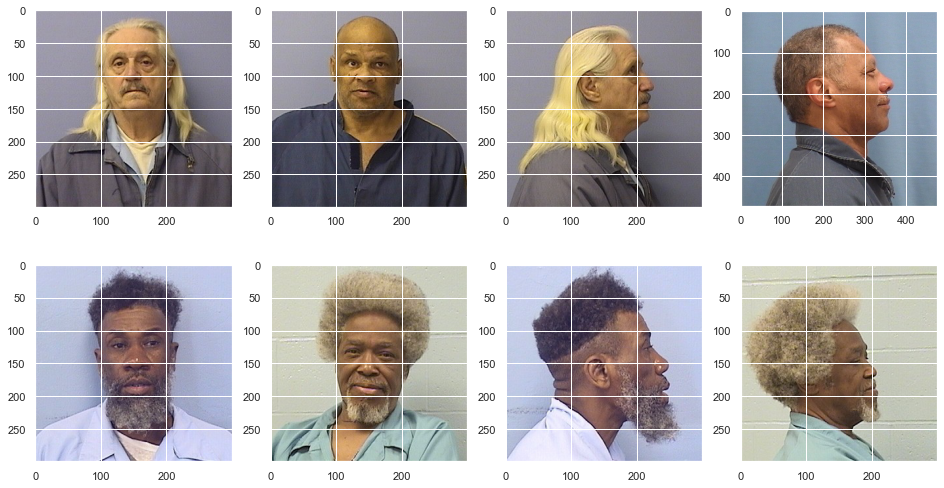

In [65]:
fig, ax = plt.subplots(2,4, figsize=(13,7), constrained_layout=True)

filenames=['{}.jpg'.format(i) for i in range(8)] #or glob or any other way to describe filenames
for i in range(8):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i%2][i//2].imshow(image)       
fig.show()

### Mugshot histograms (pixel distributions)

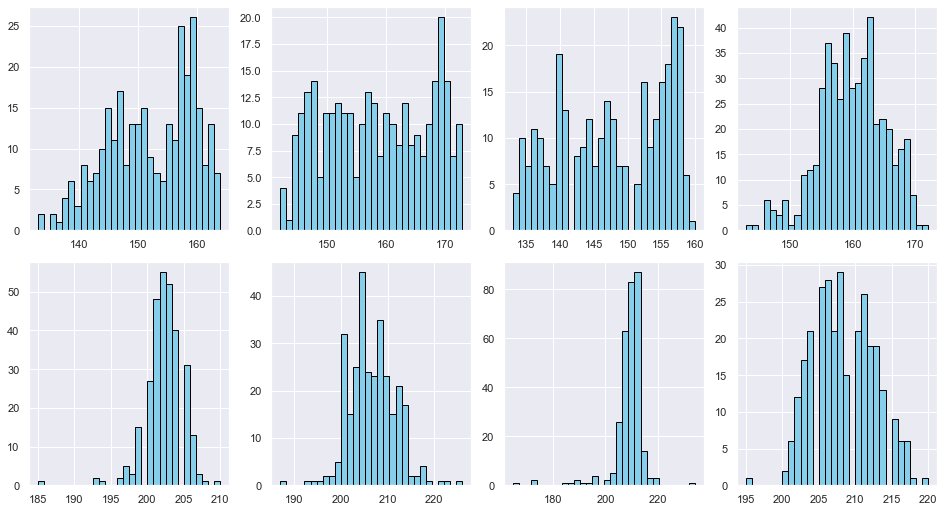

In [66]:
# Create eight polar axes and access them through the returned array
plot, axs = plt.subplots(2,4, figsize=(13,7), constrained_layout=True)
fig=['{}.jpg'.format(i) for i in range(8)] #or glob or any other way to describe filenames
for i in range(8):  
    img = cv2.imread(fig[i],0)
    axs[i%2][i//2].hist(img[i].ravel(), color = "skyblue", ec="black", bins = 30)    
plot.show()

### Other Distributions

#### Bar plots

In [67]:
# Distribution graphs
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 20]] # For displaying purposes, pick columns that have between 1 and 20 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 5 * nGraphRow), dpi = 500, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar(color = "skyblue", ec="black")
        else:
            columnDf.hist(bins=30, color = "skyblue", ec="black")
        plt.xticks(rotation = 90, size = 15)
        plt.title(f'{columnNames[i]}', size = 20)
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [68]:
# change level names
plotPerColumnDistribution(data, 100, 5)

### Correlation Matrix 

In [69]:
# Correlation matrix
c= data1.corr()
c

,weight,height,count,scar_visible,tat_visible,mc_visible,any_visible,years,sex,ethnicity,eyes,hair,offense,Age_admission
weight,1.000000,0.387419,-0.004326,-0.006507,0.018384,-0.000918,0.015230,0.053936,0.091552,-0.054317,-0.011489,-0.041706,-0.002879,-0.084807
height,0.387419,1.000000,-0.003186,-0.012098,0.030945,-0.008434,0.025245,0.040879,0.352133,0.033590,-0.002567,-0.001985,-0.022693,-0.039677
count,-0.004326,-0.003186,1.000000,0.001930,-0.000546,0.000073,0.000310,0.062128,-0.006484,0.028496,0.007956,0.020367,-0.027039,0.004257
scar_visible,-0.006507,-0.012098,0.001930,1.000000,-0.192592,-0.002792,0.238524,0.033891,-0.035391,-0.039302,-0.008610,-0.008628,0.005807,0.058563
tat_visible,0.018384,0.030945,-0.000546,-0.192592,1.000000,-0.010611,0.906538,0.008151,0.082128,-0.006202,-0.006373,-0.021598,-0.018616,-0.013751
mc_visible,-0.000918,-0.008434,0.000073,-0.002792,-0.010611,1.000000,0.013088,0.010196,-0.019208,-0.003152,-0.000089,-0.000684,-0.000457,0.002213
any_visible,0.015230,0.025245,0.000310,0.238524,0.906538,0.013088,1.000000,0.022959,0.065558,-0.023362,-0.009991,-0.025139,-0.015993,0.011582
years,0.053936,0.040879,0.062128,0.033891,0.008151,0.010196,0.022959,1.000000,0.078612,-0.040585,-0.006234,-0.046648,-0.117906,0.034776
sex,0.091552,0.352133,-0.006484,-0.035391,0.082128,-0.019208,0.065558,0.078612,1.000000,-0.026066,-0.039513,-0.120897,-0.078119,-0.009099
ethnicity,-0.054317,0.033590,0.028496,-0.039302,-0.006202,-0.003152,-0.023362,-0.040585,-0.026066,1.000000,0.202003,0.658610,0.015976,-0.075251


### Heatmap

<AxesSubplot:>

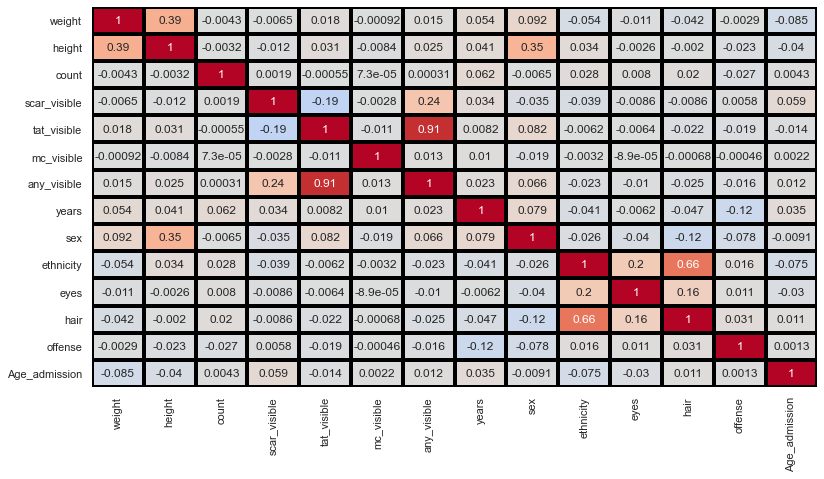

In [70]:
# Heat map
plt.figure(figsize=(13,7))
sns.heatmap(data1.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black', cbar=False)

### Cluster map

<Figure size 1080x1440 with 0 Axes>

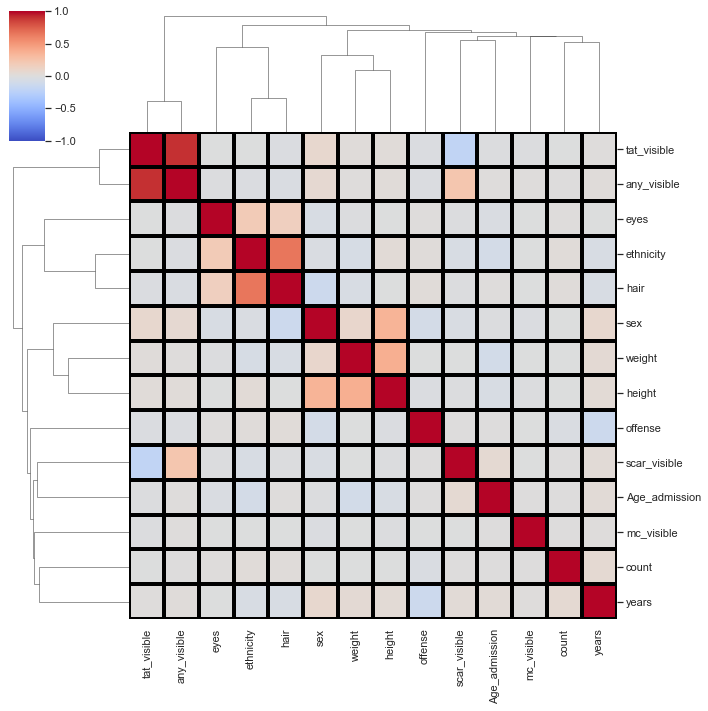

In [71]:
# Cluster map
plt.figure(figsize=(15,20))
sns.clustermap(data1.corr(),cmap="coolwarm", vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black')

### Looking into Sentencing

#### Overall distribution

We can see that there is a wide range, and some more dense areas.


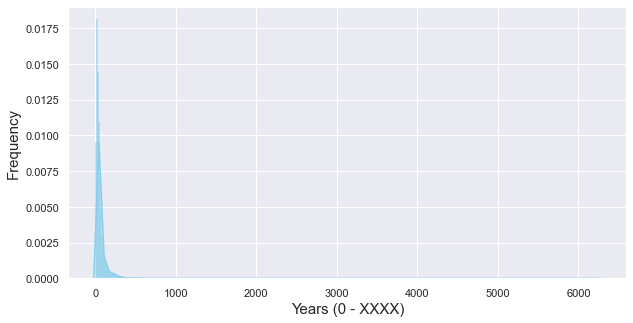

In [72]:
# Histogram
# years sentenced = complete
plt.figure(figsize=(10,5))
sns.distplot(data['years'], hist=True, kde=True, color = 'skyblue', hist_kws={'edgecolor':'skyblue'}, bins = 500)

# Add labels
plt.xlabel('Years (0 - XXXX)', size = 15)
plt.ylabel('Frequency', size = 15)

print("We can see that there is a wide range, and some more dense areas.")

#### "Zooming in"

Most sentences seem to lie somewhere between 0 and 200 years.


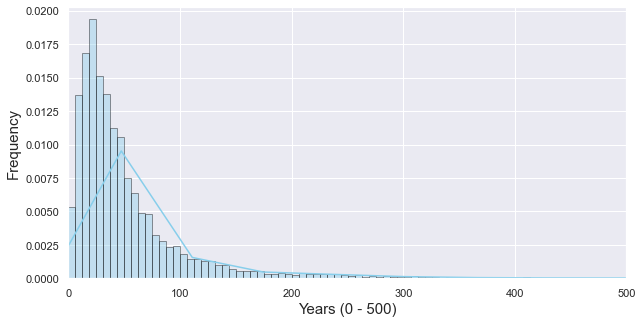

In [73]:
# years sentenced = 0 to 500 years
plt.figure(figsize=(10,5))
ax = sns.distplot(data['years'], hist=True, kde=True, color = 'skyblue', hist_kws={'edgecolor':'black'}, bins = 1000)
ax.set_xlim(0, 500)
# Add labels
plt.xlabel('Years (0 - 500)', size = 15)
plt.ylabel('Frequency', size = 15)

print("Most sentences seem to lie somewhere between 0 and 200 years.")

There also seem to be some really severe crimes.


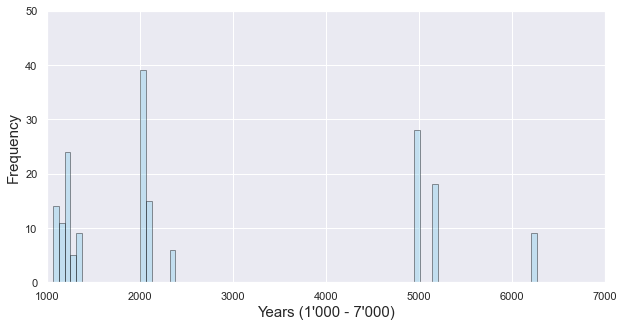

In [74]:
# years sentenced = 1000 to 7000 years
plt.figure(figsize=(10,5))
ax = sns.distplot(data['years'], hist=True, kde=False, color = 'skyblue', hist_kws={'edgecolor':'black'}, bins = 100)
ax.set_xlim(1000, 7000)
ax.set_ylim(0, 50)
# Add labels
plt.xlabel("Years (1'000 - 7'000)", size = 15)
plt.ylabel('Frequency', size = 15)

print("There also seem to be some really severe crimes.")

## Looking into categorical effects

### Ethnicity

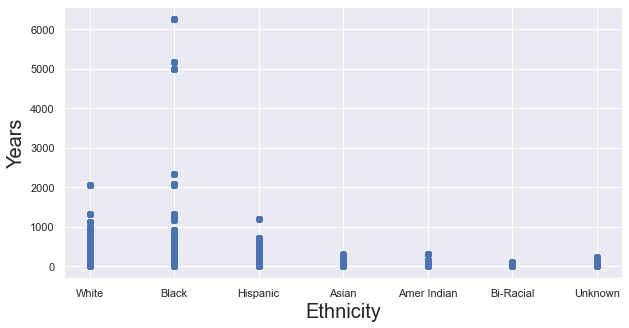

In [75]:
# Years by ethnicity
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(data['ethnicity'], data['years'])
ax.set_xlabel('Ethnicity', size = 20)
ax.set_ylabel('Years', size = 20)
plt.show()

### Sex

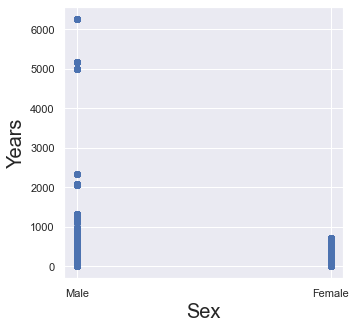

In [76]:
# Years by sex
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(data['sex'], data['years'])
ax.set_xlabel('Sex', size = 20)
ax.set_ylabel('Years', size = 20)
plt.show()

#### Some rather unsophisticated linear regression analyses...

In [77]:
# Simple linear regression analyses
X = data1["ethnicity"]
y = data1["years"]

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  years   R-squared (uncentered):                   0.331
Model:                            OLS   Adj. R-squared (uncentered):              0.331
Method:                 Least Squares   F-statistic:                          1.088e+07
Date:                Thu, 24 Sep 2020   Prob (F-statistic):                        0.00
Time:                        09:55:05   Log-Likelihood:                     -1.3108e+08
No. Observations:            22000195   AIC:                                  2.622e+08
Df Residuals:                22000194   BIC:                                  2.622e+08
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ethnicity     15.7664      0.005   3298.854      0.000      15.757      15.776
==============================================================================
Omnibus:                 38657348.599   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     237364819752.105
Skew:                          11.852   Prob(JB):                         0.00
Kurtosis:                     511.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Multiple linear regression

In [84]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22000077 entries, 0 to 22000194
Data columns (total 26 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id                   object 
 1   name                 object 
 2   date_of_birth        object 
 3   weight               float64
 4   height               float64
 5   admission_date       object 
 6   parent_institution   object 
 7   offender_status      object 
 8   mittimus             object 
 9   count                int64  
 10  custody_date         object 
 11  sentence             object 
 12  county               object 
 13  sentence_discharged  object 
 14  mark                 object 
 15  scar_visible         int64  
 16  tat_visible          int64  
 17  mc_visible           int64  
 18  any_visible          int64  
 19  years                int64  
 20  sex                  int8   
 21  ethnicity            uint8  
 22  eyes                 int8   
 23  hair                 int8   
 

In [86]:
# Some pre-processing
data1.dropna(inplace=True)
data1['ethnicity']=pd.get_dummies(data1['ethnicity'])

In [90]:
# Multiple linear regression
X = data1[['ethnicity', 'Age_admission', 'sex', 'height', 'weight', 'offense', 'scar_visible', 'mc_visible', 'tat_visible', 'any_visible']] #
Y = data1['years']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 38.66553679561506
Coefficients: 
 [ 3.49380305e+00  9.00444761e-04  2.67599218e+01 -4.50259673e-02
  2.74690550e-01 -2.35569441e-02 -3.93048313e+01  2.92398198e+01
 -5.33185681e+01  5.46699107e+01]
                            OLS Regression Results                            
Dep. Variable:                  years   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                 5.415e+04
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:15:38   Log-Likelihood:            -1.2991e+08
No. Observations:            22000077   AIC:                         2.598e+08
Df Residuals:                22000066   BIC:                         2.598e+08
Df Model:                          10                                         
Covariance Type:            nonrobust                                         

## Some Sources

- https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
- https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
- https://opencv24-python-tutorials.readthedocs.io/en/stable/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html